<a href="https://colab.research.google.com/github/Gayathri288/231801039_PODS/blob/main/PODS_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
# Step 2: Load Dataset
file_path = "powerconsumption (1).xlsx"
df = pd.read_excel(file_path, sheet_name="powerconsumption")

In [ ]:
# Step 3: Inspect Data
print("Shape of dataset:", df.shape)
print("\nColumns:", df.columns)
print("\nDataset Info:")
print(df.info())
print("\nStatistical Summary:")
print(df.describe().T)

Shape of dataset: (52416, 9)

Columns: Index(['Datetime', 'Temperature', 'Humidity', 'WindSpeed',
       'GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone1',
       'PowerConsumption_Zone2', 'PowerConsumption_Zone3'],
      dtype='object')

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage

In [ ]:
# Step 4: Clean Column Names
df.columns = df.columns.str.strip().str.replace(" ", "_")

In [ ]:
# Step 5: Handle Missing Values
# Fill numeric with median
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(df[col].median())

In [ ]:
# Fill categorical with mode (if any)
for col in df.select_dtypes(include=[object]).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

/tmp/ipython-input-1961199782.py:3: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'datetime.datetime'
  df[col] = df[col].fillna(df[col].mode()[0])


In [ ]:
# Step 6: Feature Engineering (Datetime)
df["Datetime"] = pd.to_datetime(df["Datetime"])
df["Year"] = df["Datetime"].dt.year
df["Month"] = df["Datetime"].dt.month
df["Day"] = df["Datetime"].dt.day
df["Hour"] = df["Datetime"].dt.hour
df["DayOfWeek"] = df["Datetime"].dt.dayofweek

In [ ]:
# Step 7: Derived Features
df["AvgPowerConsumption"] = df[
    ["PowerConsumption_Zone1", "PowerConsumption_Zone2", "PowerConsumption_Zone3"]
].mean(axis=1)

df["Temp_Humidity_Index"] = df["Temperature"] * df["Humidity"]

In [ ]:
# Step 8: Scaling Numerical Features
scaler = StandardScaler()
num_cols = df.select_dtypes(include=[np.number]).columns.drop("Year")  # keep Year unscaled
df[num_cols] = scaler.fit_transform(df[num_cols])

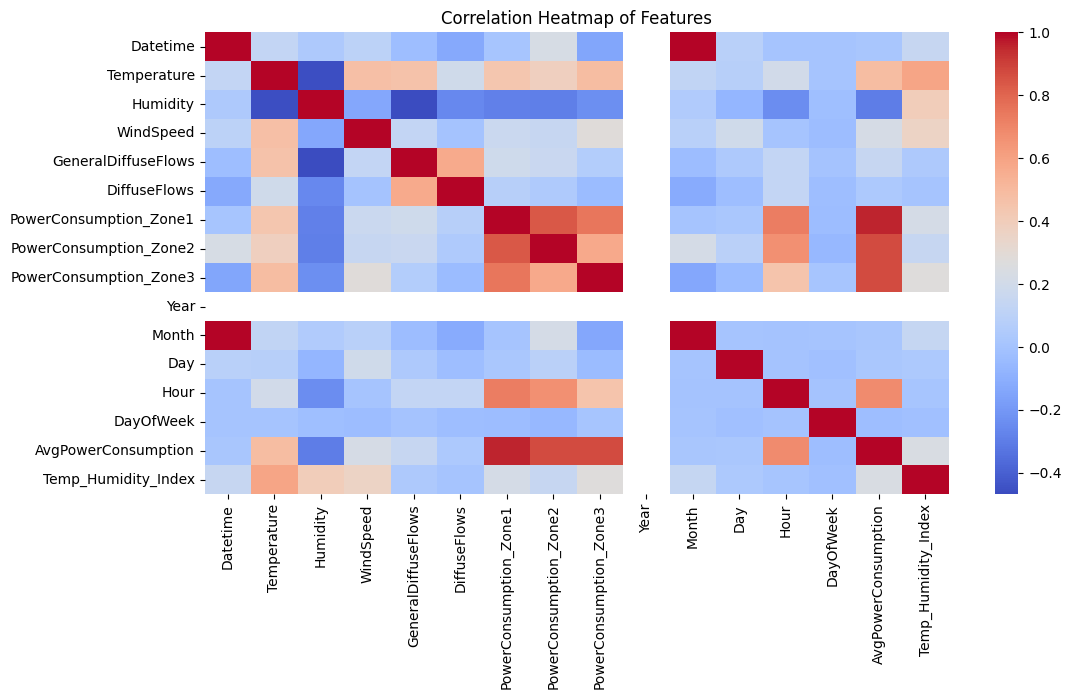

In [ ]:
# Step 9: Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Features")
plt.show()

In [ ]:
# Step 10: Preview Final Dataset
print("\nFinal Preprocessed Dataset:")
print(df.head())


Final Preprocessed Dataset:
             Datetime  Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
0 2017-01-01 00:00:00    -2.106645  0.356277  -0.798900            -0.690797   
1 2017-01-01 00:10:00    -2.131578  0.401291  -0.798900            -0.690725   
2 2017-01-01 00:20:00    -2.148946  0.401291  -0.800178            -0.690755   
3 2017-01-01 00:30:00    -2.181962  0.433443  -0.798900            -0.690646   
4 2017-01-01 00:40:00    -2.216353  0.478456  -0.799752            -0.690808   

   DiffuseFlows  PowerConsumption_Zone1  PowerConsumption_Zone2  \
0     -0.603085                0.239917               -0.944672   
1     -0.603359               -0.354854               -0.320573   
2     -0.603238               -0.451143               -0.391398   
3     -0.603270               -0.577254               -0.515516   
4     -0.603359               -0.702514               -0.609482   

   PowerConsumption_Zone3  Year     Month       Day      Hour  DayOfWeek  \
0          